In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
data = pd.read_csv("D:/Heart Disease Prediction/heart.csv")

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data_dup=data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data=data.drop_duplicates()
data_dup=data.duplicated().any()
data_dup

False

In [7]:
cate_val=[]
cont_val=[]
 
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [8]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [9]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [12]:
cate_val.remove('sex')
cate_val.remove('target')

In [13]:
data=pd.get_dummies(data,columns=cate_val,drop_first=True)
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [14]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st= StandardScaler()
data[cont_val]= st.fit_transform(data[cont_val])
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [17]:
X=data.drop('target',axis=1)

In [18]:
Y=data['target']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
X_train,Y_train,X_test,Y_test

(          age  sex  trestbps      chol   thalach   oldpeak   cp_1   cp_2  \
 163 -0.710788    1 -0.433587  0.532247  0.718568 -0.468334  False  False   
 291  0.396267    1 -0.205463  0.241930 -0.855851  1.687716  False  False   
 280 -1.042904    0 -0.091401 -0.241930  1.112172 -0.382092   True  False   
 85  -1.153610    1 -0.661712 -0.512893  0.893503 -0.899544   True  False   
 239  0.839089    0  1.049221 -0.048386  0.193761  0.307844  False  False   
 ..        ...  ...       ...       ...       ...       ...    ...    ...   
 267  1.392616    1 -0.661712 -0.183867 -3.436149 -0.037124  False  False   
 77   0.949794    1  0.478910 -1.151589 -0.243577  2.550136  False  False   
 125  0.617678    0  1.049221 -0.125804  0.937237 -0.123366  False  False   
 522  1.392616    0  1.163283  0.590310  0.980971 -0.899544  False   True   
 119 -1.375021    1 -0.661712  0.938690  0.543632 -0.899544   True  False   
 
       cp_3  fbs_1  ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   

In [22]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log=LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [25]:
Y_pred1=log.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(Y_test,Y_pred1)

0.7868852459016393

In [28]:
from sklearn import svm

In [29]:
svm=svm.SVC()

In [30]:
svm.fit(X_train,Y_train)

SVC()

In [31]:
Y_pred2=svm.predict(X_test)

In [32]:
accuracy_score(Y_test,Y_pred2)

0.8032786885245902

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn= KNeighborsClassifier()

In [35]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [36]:
Y_pred3=knn.predict(X_test)

In [37]:
accuracy_score(Y_test,Y_pred3)

0.7377049180327869

In [38]:
score=[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    score.append(accuracy_score(Y_test,Y_pred))

In [39]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [40]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8032786885245902

In [41]:
data=pd.read_csv("D:/Heart Disease Prediction/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
data=data.drop_duplicates()

In [43]:
data.shape

(302, 14)

In [44]:
X=data.drop('target',axis=1)
Y=data['target']

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier 

In [47]:
dt=DecisionTreeClassifier()

In [48]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [49]:
Y_pred4=dt.predict(X_test)

In [50]:
accuracy_score(Y_test,Y_pred4)

0.7704918032786885

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf=RandomForestClassifier()

In [53]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [54]:
Y_pred5=rf.predict(X_test)

In [55]:
accuracy_score(Y_test,Y_pred5)

0.8524590163934426

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbc=GradientBoostingClassifier()

In [58]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [59]:
Y_pred6=gbc.predict(X_test)

In [60]:
accuracy_score(Y_test,Y_pred6)

0.8032786885245902

In [61]:
Final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                         'ACC':[accuracy_score(Y_test,Y_pred1),
                                accuracy_score(Y_test,Y_pred2),
                                accuracy_score(Y_test,Y_pred3),
                                accuracy_score(Y_test,Y_pred4),
                                accuracy_score(Y_test,Y_pred5),
                                accuracy_score(Y_test,Y_pred6)]})

In [62]:
Final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.770492
4,RF,0.852459
5,GB,0.803279


In [63]:
import seaborn as sns

AttributeError: module 'matplotlib' has no attribute 'show'

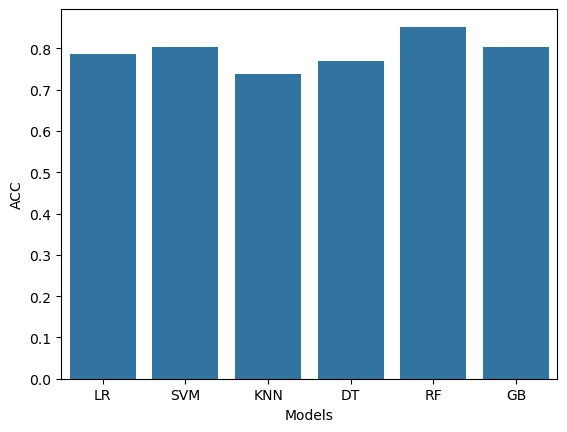

In [64]:
sns.barplot(x='Models', y='ACC', data=Final_data)
plt.show()

In [ ]:
X=data.drop('target',axis=1)
Y=data['target']

In [ ]:
X.shape

(302, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X,Y)

RandomForestClassifier()

In [ ]:
import pandas as pd

In [ ]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [ ]:
p=rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'Model_joblib_heart')

['Model_joblib_heart']

In [ ]:
model=joblib.load('Model_joblib_heart')

In [ ]:
model.predict(new_data)

array([0], dtype=int64)

In [ ]:
from tkinter import *
import joblib

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=int(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model=joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    if result==0:
        Label(master,text="No Heart Disease").grid(row=31)
    else:
        Label(master,text="Possibility Of Heart Diseases").grid(row=31)
        
master=Tk()
master.title("Heart Disease Prediction System")


label=Label(master,text="Heart Disease Prediction System",bg="red",
                fg="black").grid(row=0,columnspan=2)

Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male or Female[1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of Trestbps").grid(row=4)
Label(master, text="Enter Value of Chol").grid(row=5)
Label(master, text="Enter Value of FBS").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)
e12=Entry(master)
e13=Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)



Button(master,text='Predict',command=show_entry_fields).grid()
    
mainloop()
